<center><h2>Machine Learning for Salary Prediction</h2></center>
<img width="30%" height="40%" src="https://miro.medium.com/v2/resize:fit:1400/1*yLvf2jr_TNkEe9PKYOBDkA.png">

### Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Read data and explore it

In [2]:
# Load data from CSV file
data = pd.read_csv('train.csv')

In [3]:
data.head()

,job_id,requirements_and_role,salary_bin,mean_salary,gender_code
0,JOB-2019-0015706,role purpose role lead finance team asia offic...,9.0,20833.333333,2.0
1,JOB-2019-0013345,lead cim team source procure implement maintai...,9.0,10000.000000,2.0
2,JOB-2019-0011784,responsibilities lecturer contributions go bey...,4.0,4500.000000,2.0
3,JOB-2019-0013898,preparation welcome kits current savings accou...,6.0,6000.000000,2.0
4,JOB-2019-0000435,full time rto 18 months,3.0,3750.000000,2.0


In [4]:
data.describe()

,salary_bin,mean_salary,gender_code
count,8000.000000,8000.000000,8000.000000
mean,4.514750,5374.340922,1.381750
std,2.897384,3420.668603,0.835526
min,0.000000,500.000000,0.000000
25%,2.000000,3000.000000,1.000000
50%,4.000000,4500.000000,2.000000
75%,7.000000,6875.000000,2.000000
max,9.000000,65000.000000,2.000000


In [5]:
data.columns

Index(['job_id', 'requirements_and_role', 'salary_bin', 'mean_salary',
       'gender_code'],
      dtype='object')

In [6]:
data.shape

(13902, 5)

In [7]:
data.info

<bound method DataFrame.info of                  job_id                              requirements_and_role  \
0      JOB-2019-0015706  role purpose role lead finance team asia offic...   
1      JOB-2019-0013345  lead cim team source procure implement maintai...   
2      JOB-2019-0011784  responsibilities lecturer contributions go bey...   
3      JOB-2019-0013898  preparation welcome kits current savings accou...   
4      JOB-2019-0000435                            full time rto 18 months   
...                 ...                                                ...   
13897  JOB-2019-0018540  general sales marketing f b setting promote he...   
13898  JOB-2019-0015618  responsible development ehs system chemical sa...   
13899  JOB-2019-0009256  benefits welfare provide fashion advice tips c...   
13900  JOB-2019-0020155  client services consultant responsibilities en...   
13901  JOB-2019-0004961  1 planning scheduling staff daily basis 2 full...   

       salary_bin   mean_salary

In [8]:
np.unique(data['gender_code'].values)

array([ 0.,  1.,  2., nan])

In [9]:
np.max(data['mean_salary'].values), np.min(data['mean_salary'].values)

(nan, nan)

### Check for NULL values

In [10]:
data.isnull().sum()

job_id                      0
requirements_and_role       1
salary_bin               5902
mean_salary              5902
gender_code              5902
dtype: int64

In [11]:
data =data.dropna(subset=['gender_code'])

In [12]:
data.isnull().sum()

job_id                   0
requirements_and_role    1
salary_bin               0
mean_salary              0
gender_code              0
dtype: int64

<p> As the null values are found in the same rows for the three last columns there is no need for interpolation e.g. to set as value the median or the average based on certain criteria </p

In [13]:
data['requirements_and_role'].fillna('', inplace=True)

C:\Users\avitr\AppData\Local\Temp\ipykernel_19972\2768182236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['requirements_and_role'].fillna('', inplace=True)


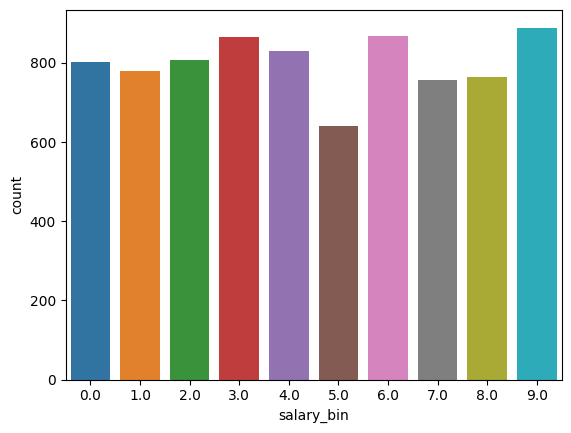

In [14]:
# Check the distribution of salary_bin
sns.countplot(x='salary_bin', data=data)
plt.show()

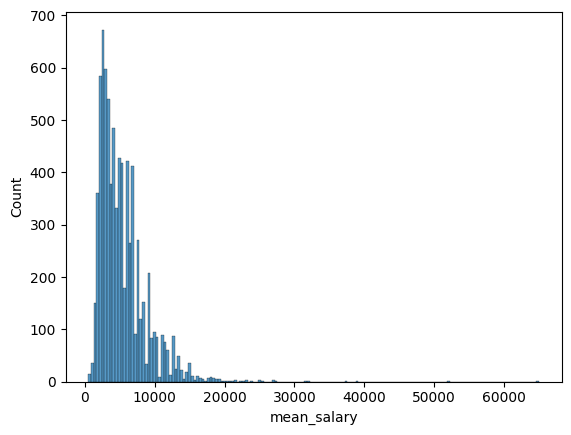

In [15]:
# Check the distribution of mean_salary
sns.histplot(x='mean_salary', data=data)
plt.show()

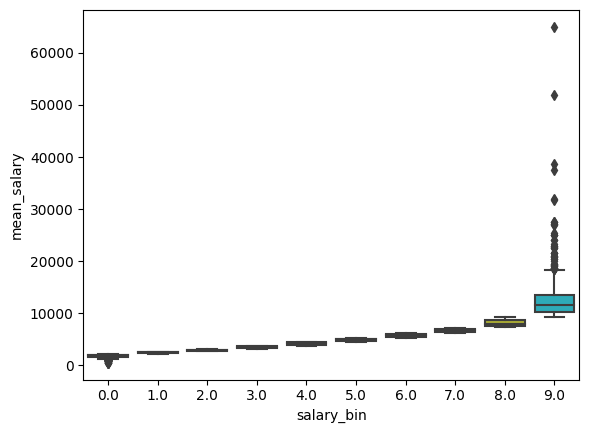

In [16]:
# Check the relationship between salary_bin and mean_salary
sns.boxplot(x='salary_bin', y='mean_salary', data=data)
plt.show()

array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>],
       [<AxesSubplot:title={'center':'2.0'}>, <AxesSubplot:>]],
      dtype=object)

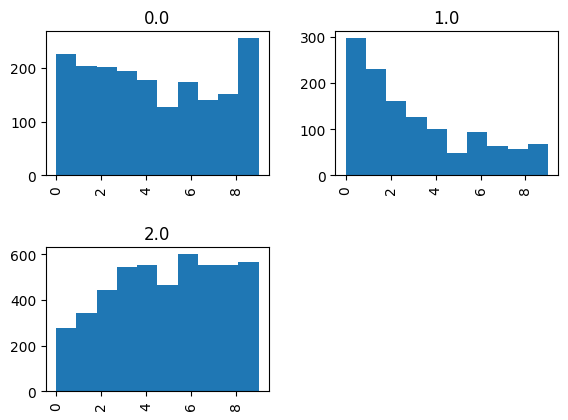

In [17]:
data['salary_bin'].hist(by=data['gender_code'])

#### Transform string ids to numeric values

In [18]:
ids = [int(item.split('JOB-2019')[1].replace("-","")) for item in data['job_id'].values]

In [19]:
data['id'] = ids
data['id'].head()

C:\Users\avitr\AppData\Local\Temp\ipykernel_19972\6638842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = ids


0    15706
1    13345
2    11784
3    13898
4      435
Name: id, dtype: int64

In [20]:
data = data.drop('job_id',axis=1)

### Modeling for Classification of Salaries

#### Preparation of data

The following code prepares the data for a machine learning model that uses both numerical and textual data as input. The code first splits the data into training and test sets using the train_test_split function. Next, the text data is vectorized using the CountVectorizer function, which converts the text into a numerical representation that can be used in machine learning algorithms. The vectorized text data is then converted into arrays and combined with the numerical data using np.concatenate. Finally, the combined data is assigned to X_train and X_test, which are the input variables for the machine learning model. This code ensures that both numerical and textual data are appropriately prepared for use in a machine learning model.

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('salary_bin', axis=1), data['salary_bin'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['requirements_and_role'])
X_test_text = vectorizer.transform(X_test['requirements_and_role'])

# Convert the vectorized text data to arrays
X_train_text_array = X_train_text.toarray()
X_test_text_array = X_test_text.toarray()

# Combine the text data with the numerical data
X_train_combined = np.concatenate((X_train.drop('requirements_and_role', axis=1), X_train_text_array), axis=1)
X_test_combined = np.concatenate((X_test.drop('requirements_and_role', axis=1), X_test_text_array), axis=1)

X_train = X_train_combined
X_test = X_test_combined

#### Supervised Machine Learning Algorithms

Linear regression, decision trees, and random forest are commonly used algorithms in the field of machine learning for both regression and classification tasks: 
1. <b>Linear regression</b> is a simple yet powerful algorithm that models the relationship between a dependent variable and one or more independent variables using a linear function. It is widely used in the field of economics, social sciences, and engineering. 
2. <b>Decision trees</b>, on the other hand, are a non-parametric supervised learning method used for classification and regression tasks. They split the data into subgroups based on the features, creating a tree-like structure that can be used to make predictions. 
3. <b>Random forest</b> is an ensemble learning method that builds multiple decision trees and combines them to make a more accurate and robust prediction. 

Finanly, the <b>fit</b> function is a method used in the training phase of machine learning algorithms to estimate the model parameters from the training data. It is used to optimize the model's coefficients, such that it can make accurate predictions on unseen data.






In [22]:
# Create lists to store the model results
models = []
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

# Train and evaluate a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
models.append('Linear Regression')
r2_scores.append(r2_score(y_test, lr_pred))
mae_scores.append(mean_absolute_error(y_test, lr_pred))
mse_scores.append(mean_squared_error(y_test, lr_pred))
rmse_scores.append(mean_squared_error(y_test, lr_pred,squared=False))

# Train and evaluate a decision tree regressor model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
models.append('Decision Tree')
r2_scores.append(r2_score(y_test, dt_pred))
mae_scores.append(mean_absolute_error(y_test, dt_pred))
mse_scores.append(mean_squared_error(y_test, dt_pred))
rmse_scores.append(mean_squared_error(y_test, dt_pred,squared=False))

# Train and evaluate a random forest regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
models.append('Random Forest')
r2_scores.append(r2_score(y_test, rf_pred))
mae_scores.append(mean_absolute_error(y_test, rf_pred))
mse_scores.append(mean_squared_error(y_test, rf_pred))
rmse_scores.append(mean_squared_error(y_test, rf_pred,squared=False))

#### Overall performance metrics for each model

In [23]:
# Calculate the overall performance metrics for each model
for i, model in enumerate(models):
    print(f'{model} performance metrics:')
    print(f'R-squared: {r2_scores[i]}')
    print(f'Mean Absolute Error: {mae_scores[i]}')
    print(f'Mean Squared Error: {mse_scores[i]}')
    print(f'Root Mean Squared Error: {rmse_scores[i]}')
    print('')

Linear Regression performance metrics:
R-squared: -282.00597368938924
Mean Absolute Error: 32.56044559340071
Mean Squared Error: 2382.666095263142
Root Mean Squared Error: 48.81256083492385

Decision Tree performance metrics:
R-squared: 0.9997030574549954
Mean Absolute Error: 0.0025
Mean Squared Error: 0.0025
Root Mean Squared Error: 0.05

Random Forest performance metrics:
R-squared: 0.9997029906429228
Mean Absolute Error: 0.0025562499999999986
Mean Squared Error: 0.0025005624999999997
Root Mean Squared Error: 0.05000562468362934



In [24]:
result = pd.DataFrame({'Models':models,'r2_scores':r2_scores,
             'mae_scores':mae_scores,'mse_scores':mse_scores,
              'rmse_scores':rmse_scores
             })

In [25]:
result

,Models,r2_scores,mae_scores,mse_scores,rmse_scores
0,Linear Regression,-282.005974,32.560446,2382.666095,48.812561
1,Decision Tree,0.999703,0.002500,0.002500,0.050000
2,Random Forest,0.999703,0.002556,0.002501,0.050006


Looking at the performance metrics for the three models, it is clear that the decision tree and random forest models perform significantly better than the linear regression model. The negative R-squared value for the linear regression model indicates that this model is performing poorly and its predictions are worse than just taking the mean value of the target variable. On the other hand, both the decision tree and random forest models have a very high R-squared value, indicating that they are both performing extremely well in predicting the target variable. Additionally, the mean absolute error and mean squared error values for both the decision tree and random forest models are significantly lower than those for the linear regression model. This suggests that the decision tree and random forest models are much more accurate in their predictions compared to the linear regression model. Overall, it seems that the decision tree and random forest models are more suitable for this particular prediction task than the linear regression model.






In [26]:
# Define the groups
gender_groups = [1.0,2.0]
balanced_group = [0]
group_labels = gender_groups + balanced_group

# Create dictionaries to store the results for each group
r2_group_results = {}
mae_group_results = {}
mse_group_results = {}
rmse_group_results = {}

#### Evaluate each model on the different groups


In [27]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [28]:
results = pd.DataFrame([],columns=['Group_label','Models','R2_scores','Mae_scores','Mse_scores','Rmse_scores'])
for group_label in tqdm(group_labels):
    
    # Create a mask to filter the data for the current group
    if group_label == 0:
        mask = data['gender_code'] == 0
    else:
        mask = data['gender_code'] == group_label
        
      
    # Filter the data for the current group
    X_group = data[mask].drop('salary_bin', axis=1)
    y_group = data[mask]['salary_bin']
    
    print(X_group.shape,y_group.shape)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_group,y_group, test_size=0.2, random_state=42)
    
    # Vectorize the text data
    vectorizer = CountVectorizer(stop_words='english')
    X_train_text = vectorizer.fit_transform(X_train['requirements_and_role'])
    X_test_text = vectorizer.transform(X_test['requirements_and_role'])

    # Convert the vectorized text data to arrays
    X_train_text_array = X_train_text.toarray()
    X_test_text_array = X_test_text.toarray()

    # Combine the text data with the numerical data
    X_train_combined = np.concatenate((X_train.drop('requirements_and_role', axis=1), X_train_text_array), axis=1)
    X_test_combined = np.concatenate((X_test.drop('requirements_and_role', axis=1), X_test_text_array), axis=1)

    X_train_group = X_train_combined
    X_test_group = X_test_combined

    # Evaluate the models on the current group
    for i, model in enumerate(models):
        if model == 'Linear Regression':
            lr = LinearRegression()
            lr.fit(X_train_group, y_train)
            lr_pred = lr.predict(X_test_group)
            r2_score_group = r2_score(y_test, lr_pred)
            mae_score_group = mean_absolute_error(y_test, lr_pred)
            mse_score_group = mean_squared_error(y_test, lr_pred)
            rmse_score_group = mean_squared_error(y_test, lr_pred)
            
            results.loc[len(results)] = [group_label,model,r2_score_group,mae_score_group,mse_score_group,rmse_score_group]
        elif model == 'Decision Tree':
            dt = DecisionTreeRegressor()
            dt.fit(X_train_group, y_train)
            dt_pred = dt.predict(X_test_group)
            r2_score_group = r2_score(y_test, dt_pred)
            mae_score_group = mean_absolute_error(y_test, dt_pred)
            mse_score_group = mean_squared_error(y_test, dt_pred)
            rmse_score_group = mean_squared_error(y_test, dt_pred)
            results.loc[len(results)] = [group_label,model,r2_score_group,mae_score_group,mse_score_group,rmse_score_group]
        else:
            rf = RandomForestRegressor()
            rf.fit(X_train_group, y_train)
            rf_pred = rf.predict(X_test_group)
            r2_score_group = r2_score(y_test, rf_pred)
            mae_score_group = mean_absolute_error(y_test, rf_pred)
            mse_score_group = mean_squared_error(y_test, rf_pred)
            rmse_score_group = mean_squared_error(y_test, rf_pred)
            results.loc[len(results)] = [group_label,model,r2_score_group,mae_score_group,mse_score_group,rmse_score_group]

        # Store the results in the dictionaries
        if group_label in r2_group_results:
            r2_group_results[group_label].append(r2_score_group)
            mae_group_results[group_label].append(mae_score_group)
            mse_group_results[group_label].append(mse_score_group)
            rmse_group_results[group_label].append(rmse_score_group)
        else:
            r2_group_results[group_label] = [r2_score_group]
            mae_group_results[group_label] = [mae_score_group]
            mse_group_results[group_label] = [mse_score_group]
            rmse_group_results[group_label] = [rmse_score_group]

        # Print the results for the current group and model
        print(f'{model} performance metrics for {group_label} group:')
        print(f'R-squared: {r2_score_group}')
        print(f'Mean Absolute Error: {mae_score_group}')
        print(f'Mean Squared Error: {mse_score_group}')
        print(f'Root Mean Squared Error: {rmse_score_group}')
        print('')


  0%|          | 0/3 [00:00<?, ?it/s]

(1250, 4) (1250,)
Linear Regression performance metrics for 1.0 group:
R-squared: 0.5632421750462742
Mean Absolute Error: 1.3761593074450327
Mean Squared Error: 3.6150200587037906
Root Mean Squared Error: 3.6150200587037906

Decision Tree performance metrics for 1.0 group:
R-squared: 0.9995167298461848
Mean Absolute Error: 0.004
Mean Squared Error: 0.004
Root Mean Squared Error: 0.004

Random Forest performance metrics for 1.0 group:
R-squared: 0.9995162949030464
Mean Absolute Error: 0.0041199999999999995
Mean Squared Error: 0.0040035999999999995
Root Mean Squared Error: 0.0040035999999999995

(4902, 4) (4902,)
Linear Regression performance metrics for 2.0 group:
R-squared: -30660.128233601492
Mean Absolute Error: 310.79999496151714
Mean Squared Error: 229542.25447773506
Root Mean Squared Error: 229542.25447773506

Decision Tree performance metrics for 2.0 group:
R-squared: 0.9998638378246031
Mean Absolute Error: 0.0010193679918450561
Mean Squared Error: 0.0010193679918450561
Root Mean

In [29]:
results

,Group_label,Models,R2_scores,Mae_scores,Mse_scores,Rmse_scores
0,1.0,Linear Regression,0.563242,1.376159,3.615020,3.615020
1,1.0,Decision Tree,0.999517,0.004000,0.004000,0.004000
2,1.0,Random Forest,0.999516,0.004120,0.004004,0.004004
3,2.0,Linear Regression,-30660.128234,310.799995,229542.254478,229542.254478
4,2.0,Decision Tree,0.999864,0.001019,0.001019,0.001019
5,2.0,Random Forest,0.999864,0.001050,0.001020,0.001020
6,0.0,Linear Regression,-0.743089,3.033827,16.151214,16.151214
7,0.0,Decision Tree,0.999708,0.002703,0.002703,0.002703
8,0.0,Random Forest,0.999613,0.005405,0.003590,0.003590


In [30]:
result

,Models,r2_scores,mae_scores,mse_scores,rmse_scores
0,Linear Regression,-282.005974,32.560446,2382.666095,48.812561
1,Decision Tree,0.999703,0.002500,0.002500,0.050000
2,Random Forest,0.999703,0.002556,0.002501,0.050006


In [31]:
normalized_df=(result-result.mean())/result.std()

C:\Users\avitr\AppData\Local\Temp\ipykernel_19972\1091372585.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(result-result.mean())/result.std()
C:\Users\avitr\AppData\Local\Temp\ipykernel_19972\1091372585.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalized_df=(result-result.mean())/result.std()


In [32]:
normalized_df['Models'] = result['Models']

In [33]:
normalized_df

,Models,mae_scores,mse_scores,r2_scores,rmse_scores
0,Linear Regression,1.154701,1.154701,-1.154701,1.154701
1,Decision Tree,-0.577352,-0.577350,0.577350,-0.577350
2,Random Forest,-0.577349,-0.577350,0.577350,-0.577350


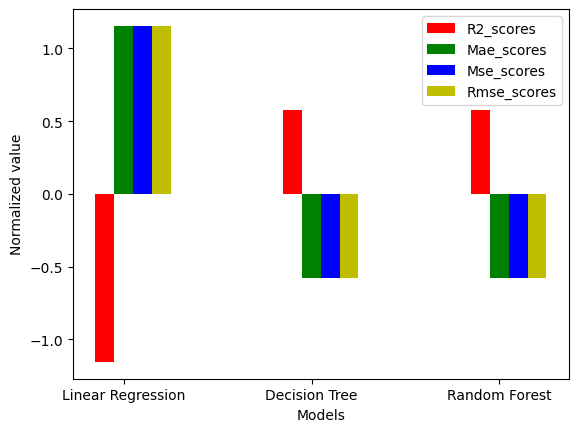

In [34]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)
width = 0.1

xvals = normalized_df['r2_scores']
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = normalized_df['mae_scores']
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = normalized_df['mse_scores']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

pvals = normalized_df['rmse_scores']
bar4 = plt.bar(ind+width*3, pvals, width, color = 'y')


plt.xlabel("Models")
plt.ylabel('Normalized value')

plt.xticks(ind+width,['Linear Regression', 'Decision Tree', 'Random Forest'])
plt.legend( (bar1, bar2, bar3,bar4), ('R2_scores','Mae_scores','Mse_scores','Rmse_scores') )
plt.savefig('a.png')
plt.show()
